<div class="alert alert-block alert-success">
    <h1 align="center">Logistic Regression With KaggleHub Data</h1>

In [22]:
# Allows us to use arrays to manipulate and store data
import numpy as np
# Used to graph data and loss curves
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
# PyTorch Library
import torch
# Used to help create the dataset and perform mini-batch
from torch.utils.data import Dataset, DataLoader
# PyTorch Neural Network
import torch.nn as nn
import kagglehub
from sklearn.preprocessing import StandardScaler

In [23]:
import pandas as pd
# Setting the seed will allow us to control randomness and give us reproducibility
torch.manual_seed(0)

## Data Set prep

In [24]:
class DiabetesDataset(Dataset):
    """The pima indian housing diabetes dataset which we will pull from kaggle."""

    def __init__(self):
        """Dataset initialization, may involve downloading the dataset."""

        path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
        df = pd.read_csv(path + "/diabetes.csv")
        self.df = df

        self.features = torch.tensor(
            df.drop(columns=["Outcome"]).values
        ).to(dtype=torch.float32)
        self.scaler = StandardScaler()
        self.features = torch.tensor(
            self.scaler.fit_transform(self.features.cpu().numpy())
        ).to(dtype=torch.float32)

        self.n_features = self.features.shape[1]
        self.targets = (
            torch.tensor(df["Outcome"].values)
            .to(dtype=torch.float32)
            .unsqueeze(1)
        )

        self.n_targets = self.targets.shape[1]

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

In [25]:
# Create Data object
data_set = DiabetesDataset()

In [26]:
data_set.features.shape

torch.Size([768, 8])

In [27]:
data_set.features[0:10]

tensor([[ 0.6399,  0.8483,  0.1496,  0.9073, -0.6929,  0.2040,  0.4685,  1.4260],
        [-0.8449, -1.1234, -0.1605,  0.5309, -0.6929, -0.6844, -0.3651, -0.1907],
        [ 1.2339,  1.9437, -0.2639, -1.2882, -0.6929, -1.1033,  0.6044, -0.1056],
        [-0.8449, -0.9982, -0.1605,  0.1545,  0.1233, -0.4940, -0.9208, -1.0415],
        [-1.1419,  0.5041, -1.5047,  0.9073,  0.7658,  1.4097,  5.4849, -0.0205],
        [ 0.3430, -0.1532,  0.2530, -1.2882, -0.6929, -0.8113, -0.8181, -0.2758],
        [-0.2510, -1.3425, -0.9877,  0.7191,  0.0712, -0.1260, -0.6761, -0.6161],
        [ 1.8278, -0.1845, -3.5726, -1.2882, -0.6929,  0.4198, -1.0204, -0.3608],
        [-0.5479,  2.3819,  0.0462,  1.5346,  4.0219, -0.1894, -0.9479,  1.6813],
        [ 1.2339,  0.1285,  1.3904, -1.2882, -0.6929, -4.0605, -0.7245,  1.7663]])

In [28]:
data_set.targets[0:10]

tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.]])

# Setting the Batch Size using a Data Loader
You have to use data loader in PyTorch that will output a batch of data, the input is the dataset and batch_size

In [29]:
traindataloader = DataLoader(dataset = data_set, batch_size = 16)

In [30]:
dataset_iter = iter(traindataloader)

In [31]:
X,y=next(dataset_iter)

In [32]:
X.shape, y.shape

(torch.Size([16, 8]), torch.Size([16, 1]))

## Model ##

In [33]:
class logistic_regression(nn.Module):
    def __init__(self, n_inputs):
        super(logistic_regression,self).__init__()
        self.linear = nn.Linear(n_inputs,1)
    def forward(self,x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

In [34]:
# Create the logistic_regression result

model = logistic_regression(data_set.features.shape[1])

In [35]:
## test forward pass
x = data_set.features[0]
sig = model(x)
sig

tensor([0.4335], grad_fn=<SigmoidBackward0>)

In [36]:
sig.detach().numpy()

array([0.43354487], dtype=float32)

## Setting the Learning Rate, Optimizer, loss function

In [37]:
criteria = nn.BCELoss()
learning_rate = 0.001

In [38]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.2910, -0.2602, -0.1362,  0.0948, -0.0070,  0.2803, -0.0314,  0.0936]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.1068], requires_grad=True)]

In [39]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

## training loop 

In [40]:
epochs = 500
loss_values = []

In [41]:
for epoch in range(epochs):
    for x,y in traindataloader:
        # Make our predictions from the X values
        yhat = model(x)
        # Measure the loss between our prediction and actual Y values
        loss = criteria(yhat, y)
        # Resets the calculated gradient value, this must be done each time as it accumulates if we do not reset
        optimizer.zero_grad()
        loss.backward()
        # Updates the weight and bias according to calculated gradient value
        optimizer.step()
        #get_surface.set_para_loss(model, loss.tolist())
        # Saves the loss of the iteration
    loss_values.append(loss)

In [42]:
len(loss_values)

500

In [21]:
#loss_values

In [43]:
w = model.state_dict()['linear.weight'].data[0]
b = model.state_dict()['linear.bias'].data[0]
print("w = ", w, "b = ", b)

w =  tensor([ 0.3411,  0.9931, -0.2229, -0.0125, -0.0666,  0.6594,  0.2873,  0.2408]) b =  tensor(-0.8189)


In [44]:
import matplotlib.pyplot as plt

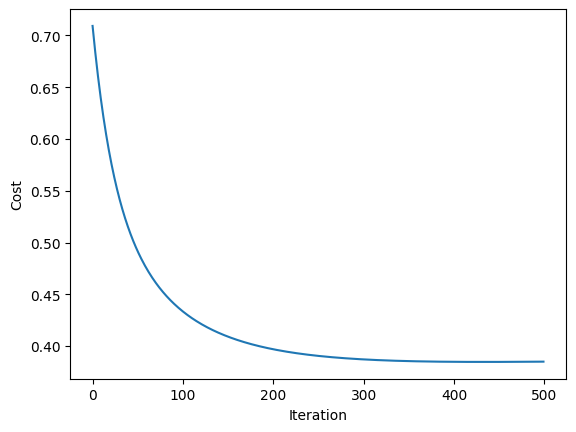

In [45]:
# Assuming loss_values is a PyTorch tensor
loss_values = torch.tensor(loss_values)

# Use tensor.detach().numpy() to convert the PyTorch tensor to a NumPy array
plt.plot(loss_values.detach().numpy())
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [68]:
# prediction
p = []
with torch.no_grad():
    # set model to evaluation mode
    model.eval()
    #for x,y in traindataloader:
    yhat = model(data_set.features)
    pr = yhat>=0.5
    p.append(pr.detach().numpy())

In [71]:
p[0][0:10]

array([[ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False]])

In [70]:

print('Train Accuracy: %f'%(np.mean(p[0] == data_set.targets.detach().numpy()) * 100))

Train Accuracy: 77.994792
